# Analyzing the NYC Subway Dataset

This report is part of Udacity's <a href = "https://www.udacity.com/course/ud359">Intro to data science course</a>

Author: Michaël Lambé (mic0331 AT gmail DOT com)

Source code can be found on <a href="https://github.com/mic0331/udacity_nanodegree/tree/master/P1">Github</a>

Document created the 01
Last updated: 26th March 2015
change log : 
    (26/03/2015)
    - Review section 1.1.2
    - Review section 1.4
    - Review section 2.4
    - Review section 2.6
    - update legend of plot on section 3.2
    - Review reflection, section 4
    - Review conclusion, section 5

## Introduction

The main idea of this project is to better understand the NYC Subway and how the frequency of the travelers is affected by the weather conditions.

For this project the <a href="https://www.dropbox.com/s/1lpoeh2w6px4diu/improved-dataset.zip?dl=0">improoved data set</a> has been used.  It contains extra data points and variables that can be used to improove the linear regression model and visualizations.

#### Libraries & Files loading

Parts of this notebook need the inline matplotlib backend and various other libraries:

In [1]:
# inline plot
%matplotlib inline  

import numpy as np
import pandas
import matplotlib.pyplot as plt
import scipy.stats
from IPython.display import display
from ggplot import *
import pylab
import seaborn as sns
from IPython.html.widgets import interact
import IPython
sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])

print("Pandas version : %s" % pandas.version.version)
print("IPython version : %s" % IPython.__version__)

Pandas version : 0.15.2
IPython version : 3.0.0


:0: FutureWarning: IPython widgets are experimental and may change in the future.


Next, we need to load the data that will be analysized in this project into a pandas datadrame

In [4]:
turnstile = './data/turnstile_weather_v2.csv'
df = pandas.read_csv(turnstile, parse_dates=['datetime'])

````shell
ls -l ./data/
total 18624
-rw-r-----@ 1 mic0331  staff    86576 Nov 19 00:55 turnstile-weather-variables.pdf
-rw-r--r--@ 1 mic0331  staff  9441559 Nov 19 00:46 turnstile_weather_v2.csv
````

Before we move in the project itself, we will provide some basic descriptive statistics about our dataset.

In [182]:
df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


This command allow us to check if the data have no anomalies such a outlier or incorrect data point (`hour` realistic and displayed as integer or `day_week` not between 0 and 6).

#### Data Shape

In [97]:
print("SHAPE: " + str(df.shape))
# show the first row
df.head(1)

SHAPE: (42649, 27)


,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01,0,6,...,30.22,0,55.9,3.5,0,30.258,55.98,7.86,40.700348,-73.887177


#### Data Types

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42649 entries, 0 to 42648
Data columns (total 27 columns):
UNIT               42649 non-null object
DATEn              42649 non-null object
TIMEn              42649 non-null object
ENTRIESn           42649 non-null int64
EXITSn             42649 non-null int64
ENTRIESn_hourly    42649 non-null float64
EXITSn_hourly      42649 non-null float64
datetime           42649 non-null object
hour               42649 non-null int64
day_week           42649 non-null int64
weekday            42649 non-null int64
station            42649 non-null object
latitude           42649 non-null float64
longitude          42649 non-null float64
conds              42649 non-null object
fog                42649 non-null int64
precipi            42649 non-null float64
pressurei          42649 non-null float64
rain               42649 non-null int64
tempi              42649 non-null float64
wspdi              42649 non-null float64
meanprecipi        42649 non-

#### Missing value

The following commands allow us to get a count of missing value.  The data looks correct with no missing value.

In [66]:
len(df.index)-df.count()
# The same could be perform with this command
# df.isnull().sum()

UNIT               0
DATEn              0
TIMEn              0
ENTRIESn           0
EXITSn             0
ENTRIESn_hourly    0
EXITSn_hourly      0
datetime           0
hour               0
day_week           0
weekday            0
station            0
latitude           0
longitude          0
conds              0
fog                0
precipi            0
pressurei          0
rain               0
tempi              0
wspdi              0
meanprecipi        0
meanpressurei      0
meantempi          0
meanwspdi          0
weather_lat        0
weather_lon        0
dtype: int64

#### ENTRIESn_hourly Statistics

In [67]:
# As we will use this feature extensively, it is good to give some descriptive stats... 
df['ENTRIESn_hourly'].describe()

count    42649.000000
mean      1886.589955
std       2952.385585
min          0.000000
25%        274.000000
50%        905.000000
75%       2255.000000
max      32814.000000
Name: ENTRIESn_hourly, dtype: float64

## 1. <u>Statistical Test</u>

### 1.1. Which statistical test did you use to analyse the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

#### 1.1.1. Normality check

<p  align="justify">To answer this question, the first step is to visualize the data and look if our data follow a normal distribution.
The following graph plot two histograms on the same axes to show hourly entries when raining vs. when not raining.

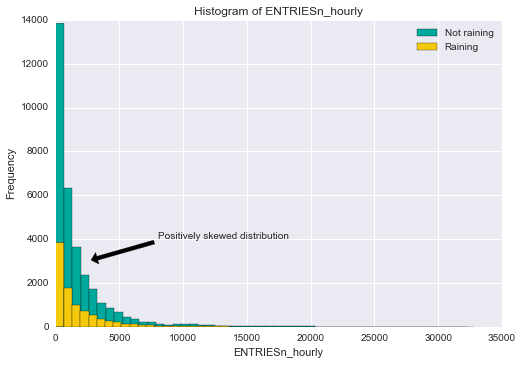

In [68]:
fig = plt.figure()
hist1 = df['ENTRIESn_hourly'][df['rain']==0].hist(bins=50)
hist2 = df['ENTRIESn_hourly'][df['rain']==1].hist(bins=50)
ax = fig.add_subplot(111)
ax.set_title('Histogram of ENTRIESn_hourly')
ax.set_xlabel('ENTRIESn_hourly')
ax.set_ylabel('Frequency')
ax.annotate('Positively skewed distribution', xy=(2500, 3000), xytext=(8000, 4000), arrowprops=dict(facecolor='black', shrink=0.05))
ax.legend(('Not raining', 'Raining'), loc = 'upper right')

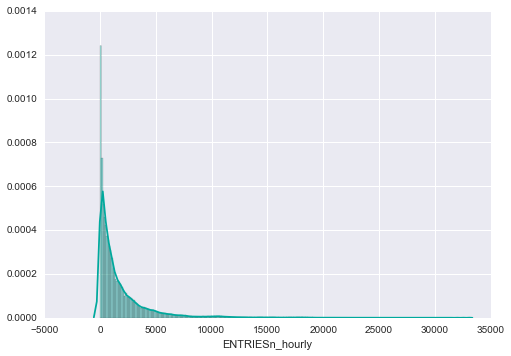

In [69]:
sns.distplot(df.ENTRIESn_hourly)
plt.show()

<p align="justify">The above histogram show positive skewness (tail extending to the right) and positive kurtosis (high peak); and the descriptive statistics below for `ENTRIESn_hourly` parallel this information. 
<p align="justify">Problem -- The question is “how much” skew or kurtosis render the data non-normal? This is an arbitrary determination, and sometimes difficult to interpret using the values of Skewness and Kurtosis. Luckily, there are more objective tests of normality, described next.

In [70]:
sa = scipy.stats.skew(df['ENTRIESn_hourly'][df['rain']==0])
ka = scipy.stats.kurtosis(df['ENTRIESn_hourly'][df['rain']==0])
print("Skew val when no rain=%s" % (sa))
print("Kurtosis val when no rain=%s" % (ka))
sa = scipy.stats.skew(df['ENTRIESn_hourly'][df['rain']==1])
ka = scipy.stats.kurtosis(df['ENTRIESn_hourly'][df['rain']==1])
print("Skew val when rain=%s" % (sa))
print("Kurtosis val when rain=%s" % (ka))

Skew val when no rain=4.031910728893787
Kurtosis val when no rain=23.404520148041282
Skew val when rain=3.9569681777429304
Kurtosis val when rain=21.986619743475618


<p align="justify">The <b>Kolmogorov-Smirnov test (K-S)</b> and <b>Shapiro-Wilk (S-W) tests</b> are designed to test normality by comparing the data to a normal distribution with the same mean and standard deviation of the sample.
<p align="justify">If the test is NOT significant, then the data are normal, so any value above .05 indicates normality.
<p align="justify">If the test is significant (less than .05), then the data are non-normal.
<p align="justify">We will use the Shapiro-Wilk test has this test has the highest power among all tests for normality

In [71]:
data = df['ENTRIESn_hourly']
w, p = scipy.stats.shapiro(data)
# Test the null hypothesis with 5% alpha
alpha = .05
p > alpha

/Users/mic0331/anaconda/lib/python3.4/site-packages/scipy/stats/morestats.py:997: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


False

Since this p-value is much smaller than the significance level, we reject the null hypothesis that this sample comes from a normal distribution.
<p>Also, we should keep in mind one limitation of the normality tests which is that the larger the sample size, the more likely to get significant results. Thus, we may get significant results with only slight deviations from normality when sample sizes are large.  This is why we are getting a warning message bellow the above command.
<p align="justify">An other option to look at normality is to use <b>Normal Q-Q Plot</b>.  This tool provides a graphical way to determine the level of normality. 

<p align="justify">Bellow, the red line indicates the values the sample should adhere to if the distribution was normal. The dots are the actual data. If the dots fall exactly on the red line, then the data are normal. If they deviate from the red line, the data are non-normal. We clearly see that the data for `ENTRIESn_hourly` deviate from the line.

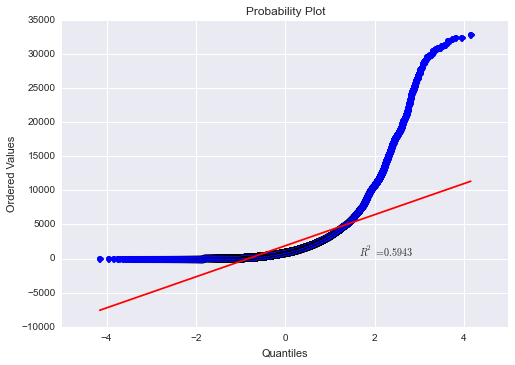

In [72]:
scipy.stats.probplot(df['ENTRIESn_hourly'], dist="norm", plot=pylab)
pylab.show()

We can therefore draw an apparrent conclusion that Rainy/Non-rainy days and their number of entries are <b>not</b> normally distributed.

#### 1.1.2. Non-parametric test - Mann-Whitney u test

<p align="justify">We can use a `non-parametric` test which is a statistical test that does not assume that our data are drawn from any particular underlying probability distribution.

<p align="justify">The test used in this project is the <b><u>Mann-Whitney u test (MWUt)</u></b> (also known <b>Wilcoxon rank-sum test</b>)

<u>A two-tail p-value was selected</u> since we would like to know whether or not there is a statistically significance between the populations.  

As a side note, picking a one-tailed test means that we would assume in advance (before we collect the data) that rain will not be associated with lower ridership, which is a very strong assumption.

<p>In mathematical terms, given random draws `x` from population X and `y` from population Y, the standard two-tailed hypothesis are as follows :

$$
H_O : P(x > y) = 0.5
$$
$$
H_1 : P(x > y) \neq 0.5
$$

If we translate this to the case of the ridership, the null hypothesis for Mann Whitney says that if we chose two points $p_1$ and $p_2$ from the distributions of ridership on rainy and non-rainy days respectively, than the probability $P(p_1 > p_2)$ statifies $P(p_1 > p_2) = .5$.  So, here there is 50% chance that $p_1$ is bigger than $p_2$ (we would expect this if the two distributions were the same).  

The alternative hypothesis is that $P(p_1 > p_2) \neq .5$, but we don't know if $P(p_1 > p_2) > .5$ or $P(p_1 > p_2) \leq .5$, so we must use a two tailed test.

In [19]:
a = df['ENTRIESn_hourly'][df['rain']==1]
b = df['ENTRIESn_hourly'][df['rain']==0]
with_rain_mean = np.mean(a)
without_rain_mean = np.mean(b)
U, p = scipy.stats.mannwhitneyu(a, b)
print("Mean with rain : %.2f" % with_rain_mean)
print("Mean without rain : %.2f" % without_rain_mean)
print("U-statistic : %.2f" % U)
print ("P-value : %.7f" % p)

Mean with rain : 2028.20
Mean without rain : 1845.54
U-statistic : 153635120.50
P-value : 0.0000027


### 1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

<p align="justify">The answer to this question has been partially explaied in the previous question.  The MWUt is a non-parametric test which does not assume any particular distribution, as opposed to t-test (or whelch's t-test for sample of different sizes).  As the histogram, the qq-plot and the Shapiro test suggest, the data are non-normal and therefore the MWUt is the best fit for the NYC subway data set.

### 1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.

Again, the answer to this question has been partially exposed in the first question.
Here are the numerical values.

In [18]:
a = df['ENTRIESn_hourly'][df['rain']==1]
b = df['ENTRIESn_hourly'][df['rain']==0]
with_rain_mean = np.mean(a)
without_rain_mean = np.mean(b)
U, p = scipy.stats.mannwhitneyu(a, b)
print("Mean with rain : %.2f" % with_rain_mean)
print("Mean without rain : %.2f" % without_rain_mean)
print("U-statistic : %.2f" % U)
print ("P-value : %.7f" % p)

Mean with rain : 2028.20
Mean without rain : 1845.54
U-statistic : 153635120.50
P-value : 0.0000027


<u>Quick evidence</u> : The MWUt returned a p-value of 0.025, so we reject the null hypothesis that both data sets are identical and have the same mean. In other words, both sample means are statistically different.

### 1.4 What is the significance and interpretation of these results?

In [58]:
ratio = 100 - (without_rain_mean / with_rain_mean)*100
print("Differences between rain and no-rain is %.2f%%" % ratio)    

Differences between rain and no-rain is 9.01%


Comparing the means yields 9.01% more subway entries when it rains. This statistic alone is insufficient in drawing conclusions or correlation. 

The U-statistic has a high value. The maximum value of U is the product of the sample sizes for the two samples.

In [45]:
U_max = len(a) * len(b)
print("Maximum value of U is %d" % U_max)

Maximum value of U is 316918440


163283319.5

A U-statistic of half the maximum would indicate that the null hypothesis is true.  On the other hand, values that are far away from half the maximum are indicative that the null hypothesis is not the true state of the world.

In [56]:
m = U_max / 2
print("[nx*ny/2]= %.2f" % m)

[nx*ny/2]= 158459220.00


The U-statistic (153635120.50) is far from half the maximum (158459220.00) so we can conclude that the null hypothesis is not true and therefore there is difference with or without rain.

Of note, the p-value 0.025 satisfies the p-critical value, and the conclusion can be drawn with 95% confidence that the null hypothesis is false and that ridership is different with vs. without rain.

## 2. <u>Linear Regression</u>

### 2.1 What approach did you use to compute the coefficients theta and produce prediction for `ENTRIESn_hourly` in your regression model?

<p align="justify">Both gradient descent (GD) and Ordinary least squares (OLS) models where used to run linear regression on the NYC subway dataset. Both models look for linear relationships between the features and the predicted values or NYC subway rides.
<p align="justify">For each method used, detail implementation is describe for completness of this project.
<p>Something to note, the OLS implementation is much faster than GD for this small dataset.

#### 2.1.1. Gradient descent

##### Theory

<p>At a theoretical level, gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved using calculus, taking steps in the negative direction of the function gradient.
<p>It’s sometimes difficult to see how this mathematical explanation translates into a practical setting, so it’s helpful to look at an example. The canonical example when explaining gradient descent is linear regression.
<p>Simply stated, the goal of linear regression is to fit a line to a set of points. 
<p>Let’s suppose we want to model a set of points with a line. To do this we’ll use the standard $y = mx + b$ line equation where $m$ is the line’s slope and $b$ is the line’s y-intercept. To find the best line for our data, we need to find the best set of slope $m$ and y-intercept $b$ values.
<p>A standard approach to solving this type of problem is to define an error function (also called a <b>cost function</b>) that measures how “good” a given line is. This function will take in a $(m,b)$ pair and return an error value based on how well the line fits the data. To compute this error for a given line, we’ll iterate through each $(x,y)$ point in the data set and sum the square distances between each point’s $y$ value and the candidate line’s $y$ value (computed at $mx + b$). It’s conventional to square this distance to ensure that it is positive and to make our error function differentiable. In python, computing the error for a given line will look like:

In [50]:
# y = mx + b
# m is slope, b is y-intercept
def total_error(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        totalError += (points[i].y - (m * points[i].x + b)) ** 2
    return totalError / float(len(points))

Formally, this error function looks like:

$$
Error_{(m,b)}={\frac{1}{N}}\sideset{}{}\sum_{i=1}^N(y_i-(mx_i+b))^2
$$

<p>Lines that fit the data better (where better is defined by our error function) will result in lower error values. If we minimize this function, we will get the best line for our data.
<p>Since our error function consists of two parameters (m and b) we can visualize it as a two-dimensional surface. This is what it looks like for random dataset:

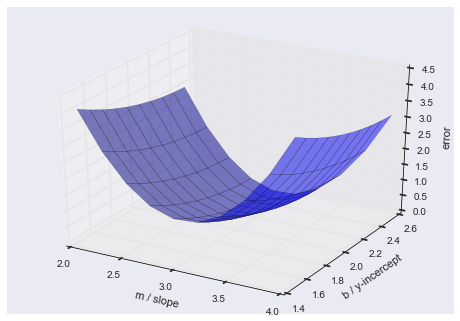

In [52]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def error(m, b, points):
    totalError = 0
    for i in range(0, len(points)):
        totalError += (points[i].y - (m * points[i].x + b)) ** 2
    return totalError / float(len(points))

x = y = np.arange(-3.0, 3.0, 0.05)
Point = collections.namedtuple('Point', ['x', 'y'])

m, b = 3, 2
noise = np.random.random(x.size)
points = [Point(xp, m*xp+b+err) for xp,err in zip(x, noise)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ms = np.linspace(2.0, 4.0, 10)
bs = np.linspace(1.5, 2.5, 10)

M, B = np.meshgrid(ms, bs)
zs = np.array([error(mp, bp, points) 
               for mp, bp in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.set_xlabel('m / slope')
ax.set_ylabel('b / y-incercept')
ax.set_zlabel('error')

plt.show()

<p>Each point in this two-dimensional space represents a line. The height of the function at each point is the error value for that line. We can see that some lines yield smaller error values than others (i.e., fit our data better). When we run gradient descent search, we will start from some location on this surface and move downhill to find the line with the lowest error.

To run gradient descent on this error function, we first need to compute its gradient. The gradient will act like a compass and always point us downhill. To compute it, we will need to differentiate our error function. Since our function is defined by two parameters ($m$ and $b$), we will need to compute a partial derivative for each. These derivatives work out to be:

$$
\frac{\partial}{\partial m} = {\frac{2}{N}}\sideset{}{}\sum_{i=1}^N-x_i(y_i-(mx_i+b))
$$
$$
\frac{\partial}{\partial b} = {\frac{2}{N}}\sideset{}{}\sum_{i=1}^N-(y_i-(mx_i+b))
$$

We now have all the tools needed to run gradient descent. We can initialize our search to start at any pair of $m$ and $b$ values (i.e., any line) and let the gradient descent algorithm march downhill on our error function towards the best line. Each iteration will update $m$ and $b$ to a line that yields slightly lower error than the previous iteration. The direction to move in for each iteration is calculated using the two partial derivatives from above and looks like this:

In [53]:
def stepGradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        b_gradient += -(2/N) * (points[i].y - ((m_current*points[i].x) + b_current))
        m_gradient += -(2/N) * points[i].x * (points[i].y - ((m_current * points[i].x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

The <i>learningRate</i> variable controls how large of a step we take downhill during each iteration. If we take too large of a step, we may step over the minimum. However, if we take small steps, it will require many iterations to arrive at the minimum.

In this sesction, we used Gradient descent to iteratively estimate $m$ and $b$.  This simple linear regression problem does not need GD to be solved.  However, GD and the concept of parameter optimization/tuning is used in the next section so the same principle used here will be apply for the project problem where we have more features.

##### Implementation

<p>Before moving in the code, here are the objectives of the algorithm implemented for this project:

<p>Hypothesis: $h_\theta(x)=\theta_0+\theta_1x$
<p>Parameters: $\theta_0,\theta_1$
<p>The ideal case is to choose $\theta_0$, $\theta_1$ so that $h_\theta(x)$ is close yo $y$ for our training example ($(x,y)$
<p>Cost Function: $
J(\theta_0,\theta_1)
={\frac{1}{2m}}\sideset{}{}\sum_{i=1}^N(h_\theta(x^{(i)})-y^{(i)})^2
={\frac{1}{2m}}\sideset{}{}\sum_{i=1}^N(predictions−actuals)^2$, This function is the squared error function
<p>Goal: minimize $J(\theta_0,\theta_1)$
<p>We can use the Gradient Descent algorithm to find the minimum value of the cost function. We do this by starting at some θ values (initialize to 0 for instance) and then iteratively updating θ with small amounts descending down until we reach convergence. That is when we hit the global minimum of the cost function.
<p>This is shown visually with the following picture:

<img src="pictures/univariat-gradient-descent.png">

Each time we run the following step, we get closer and closer to the values of \theta which minimize the cost function:
$$
\theta_j=\theta_j+{\frac{\alpha}{m}}\sideset{}{}\sum_{i=1}^N(\theta^Tx-y)x
$$
where $\alpha$ is the learning rate. Setting this value too small will cause us to converge very slowly but we'll always get the right answer eventually, whereas setting it too large goes faster but may cause us to diverge and never get the right answer.

If we have more than one feature, we have a more complicated task at hand. The 3D surface plot below shows a model with two features $\theta_0$ and $\theta_1$. The colored stars show the Gradient Descent algorithm at work in finding the lowest point in the bowl. Only now it minimizes for $\theta_0$ and $\theta_1$ combined. So the height from the bottom of the plot to the surface is the value of . By taking small steps downwards, we try to find the global minimum (for all $\theta$ values combined). We repeat until convergence.

<img src="pictures/3d-surface-plot-gradient-descent.png">

The first step was to follow the implementation of the gradient descent as described in the course.  Some minor changes has been made to the code to make a reusable class implementation of the algorithm.

In [62]:
class GradientDescent(object):
    def __init__(self, df):
        self.dataframe = df
        
    def normalize_features(self, df):
        """
        Normalize the features in the data set.
        """
        mu = df.mean()
        sigma = df.std()

        if (sigma == 0).any():
            raise Exception("One or more features had the same value for all samples, and thus could " + \
                             "not be normalized. Please do not include features with only a single value " + \
                             "in your model.")
        df_normalized = (df - df.mean()) / df.std()

        return df_normalized, mu, sigma

    def compute_cost(self, features, values, theta):
        """
        Compute the cost function given a set of features / values, 
        and the values for our thetas.
        """

        m = len(values)
        sum_of_square_errors = np.square(np.dot(features, theta) - values).sum()
        cost = sum_of_square_errors / (2*m)

        return cost

    def gradient_descent(self, features, values, theta, alpha, num_iterations):
        """
        Perform gradient descent given a data set with an arbitrary number of features.
        """

        m = len(values)
        cost_history = []

        m = len(values)
        cost_history = []
        m = len(features)
        for i in range(0, num_iterations):
            cost = self.compute_cost(features, values, theta)
            cost_history.append(cost)
            theta = theta + (alpha/m) * np.dot((values - np.dot(features,theta)),features)

        return theta, pandas.Series(cost_history)

    def predictions(self, features, values, dummies, alpha, num_iterations):
        """
        Make predictions
        """
        
        features = features.join(dummies)
        
        m = len(values)

        features, mu, sigma = self.normalize_features(features)
        features['ones'] = np.ones(m) # Add a column of 1s (y intercept)

        # Convert features and values to numpy arrays
        features_array = np.array(features)
        values_array = np.array(values)

        # Initialize theta, perform gradient descent
        theta_gradient_descent = np.zeros(len(features.columns))
        theta_gradient_descent, cost_history = self.gradient_descent(features_array, 
                                                                values_array, 
                                                                theta_gradient_descent, 
                                                                alpha, 
                                                                num_iterations)

        plot = None
        plot = self.plot_cost_history(alpha, cost_history)

        predictions = np.dot(features_array, theta_gradient_descent)
        return predictions, plot


    def plot_cost_history(self, alpha, cost_history):
       """
       Plot the cost function
       """
       cost_df = pandas.DataFrame({
          'Cost_History': cost_history,
          'Iteration': range(len(cost_history))
       })
       return ggplot(cost_df, aes('Iteration', 'Cost_History')) + \
          geom_point()+ geom_line() + ggtitle('Cost History for alpha = %.3f' % alpha )


Now we create an instance and calculate our predictions.

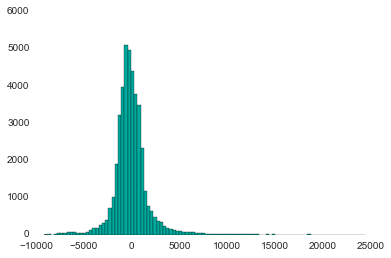

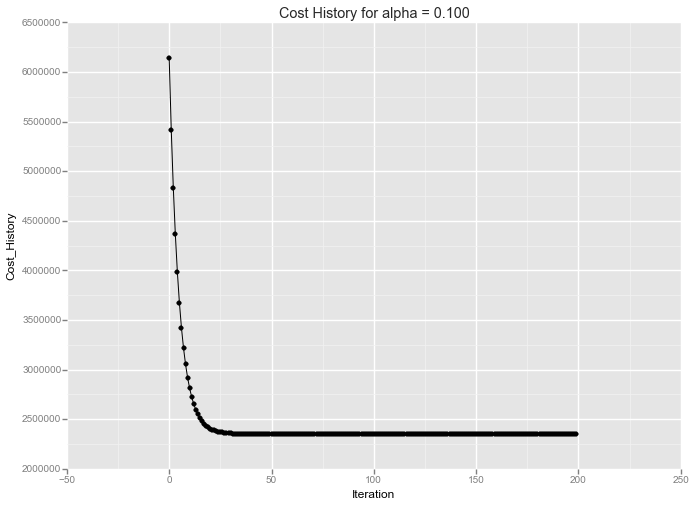

<ggplot: (282898731)>


In [63]:
gd = GradientDescent(df)

# Select Features
features = df[['rain', 'precipi', 'hour', 'meantempi']]
# Add UNIT to features using dummy variables
dummy_units = pandas.get_dummies(df['UNIT'], prefix='unit') #Remote unit that collects turnstile information.
# Values
values = df['ENTRIESn_hourly']
# Alpha, number of iterations.
alpha = 0.1 
num_iterations = 200

predictions_gd, plot = gd.predictions(features, values, dummy_units, alpha, num_iterations)
(values-predictions_gd).hist(bins=100)

print(plot)

Above is a plot of error values for the first 200 iterations of the gradient search.  We see that the gradient descent is working correctly.  The error decreases for each iteration.

Finally, we will plot the predicted values agains the observed value.

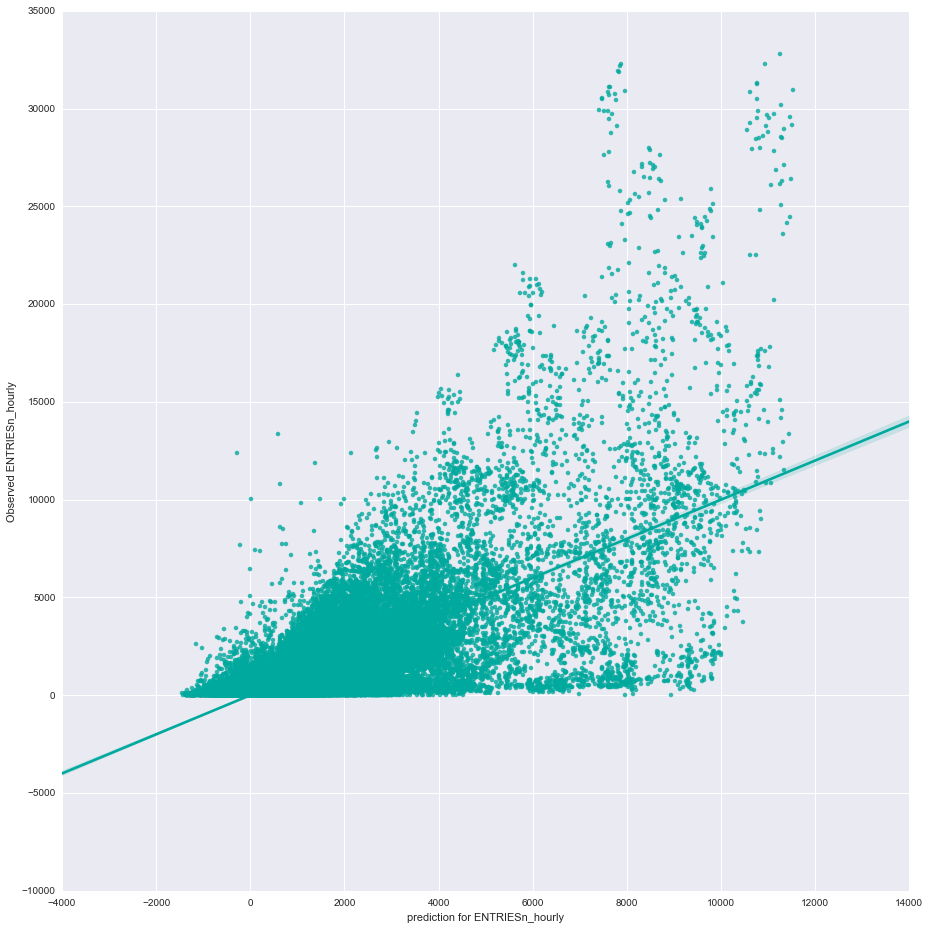

In [78]:
data = pandas.DataFrame({'x': predictions_gd, 
                         'y': values})

p = sns.lmplot('x', 'y', data=data, size=13)
p.set_axis_labels("prediction for ENTRIESn_hourly", "Observed ENTRIESn_hourly")

There are several additional concepts that are good to be aware of when using GD.  A few of these include:
<ul>
<li><b>Convexity</b> – In our linear regression problem, there was only one minimum. Our error surface was convex. Regardless of where we started, we would eventually arrive at the absolute minimum. In general, this need not be the case. It’s possible to have a problem with local minima that a gradient search can get stuck in. There are several approaches to mitigate this (e.g., stochastic gradient search).</li>
<li><b>Performance</b> – We used vanilla gradient descent with a learning rate of 0.1 in the above example, and ran it for 200 iterations. There are approaches such a line search, that can reduce the number of iterations required. For the above example, line search reduces the number of iterations to arrive at a reasonable solution from several thousand to around 50.</li>
<li><b>Convergence</b> – We didn’t talk about how to determine when the search finds a solution. This is typically done by looking for small changes in error iteration-to-iteration (e.g., where the gradient is near zero).</li>
</ul>

#### 2.1.2. OLS using Statsmodels

##### Theory

Ordinary least squares (OLS) or linear least squares is a method for estimating the unknown parameters in a linear regression model, with the goal of minimizing the differences between the observed responses in some arbitrary dataset and the responses predicted by the linear approximation of the data (visually this is seen as the sum of the vertical distances between each data point in the set and the corresponding point on the regression line - the smaller the differences, the better the model fits the data).

##### Implementation

Here is the OLS model implementation.

In [70]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def predictions(weather_turnstile):
    # convert units
    dummy_units = pandas.get_dummies(weather_turnstile['UNIT'], prefix='unit')
    
    y = weather_turnstile['ENTRIESn_hourly']
    x = weather_turnstile[['rain', 'precipi', 'hour', 'meantempi']]
    # add the units
    x = x.join(dummy_units)
    # model matrix with intercept
    X = sm.add_constant(x)
    #least squares fit
    model = sm.OLS(y, X)
    fit = model.fit()
        # other implementation
        #features = weather_turnstile[['UNIT', 'rain', 'precipi', 'Hour', 'meantempi']]
        #model = smf.ols('ENTRIESn_hourly ~ UNIT * Hour + rain + meantempi', data=weather_turnstile).fit()
    # Return linear predicted values from a design matrix
    prediction = fit.predict(X)
    
    print(fit.summary())
    (y-prediction).hist(bins=100)
    
    return prediction, fit

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     149.1
Date:                Wed, 25 Mar 2015   Prob (F-statistic):               0.00
Time:                        12:35:08   Log-Likelihood:            -3.8813e+05
No. Observations:               42649   AIC:                         7.767e+05
Df Residuals:                   42405   BIC:                         7.789e+05
Df Model:                         243                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1366.3289    104.953     13.018      0.0

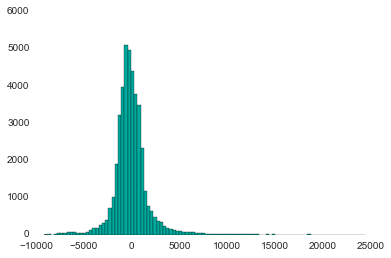

In [71]:
predictions_OLS, fit = predictions(df)

Here is an other implementation using `pandas.stats.api`

In [66]:
from pandas.stats.api import ols

y = df['ENTRIESn_hourly']
dummy_units = pandas.get_dummies(df['UNIT'], prefix='unit')
x = df[['rain', 'precipi', 'hour', 'meantempi']]
x = x.join(dummy_units)
res = ols(y=y, x=x)
res


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <rain> + <precipi> + <hour> + <meantempi> + <unit_R003>
             + <unit_R004> + <unit_R005> + <unit_R006> + <unit_R007> + <unit_R008>
             + <unit_R009> + <unit_R011> + <unit_R012> + <unit_R013> + <unit_R016>
             + <unit_R017> + <unit_R018> + <unit_R019> + <unit_R020> + <unit_R021>
             + <unit_R022> + <unit_R023> + <unit_R024> + <unit_R025> + <unit_R027>
             + <unit_R029> + <unit_R030> + <unit_R031> + <unit_R032> + <unit_R033>
             + <unit_R034> + <unit_R035> + <unit_R036> + <unit_R037> + <unit_R038>
             + <unit_R039> + <unit_R040> + <unit_R041> + <unit_R042>
             + <unit_R043> + <unit_R044> + <unit_R046> + <unit_R049> + <unit_R050>
             + <unit_R051> + <unit_R052> + <unit_R053> + <unit_R054> + <unit_R055>
             + <unit_R056> + <unit_R057> + <unit_R058> + <unit_R059> + <unit_R060>
             + <unit_R061> + <un

### 2.2. What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?

<p align="justify">For both model, the following features were used :
<p><u>Quantitative features used:</u>
<ul>
<li>Rain,</li> 
<li>Precipitation (precipi),</li> 
<li>Hour of the day (Hour), </li>
<li>Mean temperature (meantempi) and</li>
</ul>
<p><u>Qualitative features used :</u> 'UNIT'. As a categorical feature, this variable required the use of dummy variables.

### 2.3. Why did you select these features in your model? We are looking for specific reasons that lead you to believe that the selected features will contribute to the predictive power of your model. Your reasons might be based on intuition. For example, response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.” Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my $R^2$ value.” 

After testing various features, these were the most relevant and important features based on their explicatory power and statistical significance. I had a bias for choosing the simplest model possible, without loosing too much explicatory power or $R^2$.

The specific reasons are explained bellow :
<ul>
<li>As it rain, the number of people will increase as these people will decide to use the subway more often.</li>
<li>For the same reason as above, as the precipitation increase we can assume more people will take the subway</li>
<li>The temperature may also be a strong influencer.  If it is clod, more people will decide to take the subway.</li>
<li>The units is an important predictor since it is the actual locations of the turnstile, where people are going in and out.  A special treatment to convert them from a categorical feature to something usable by the algorithm.
<li>Hour is used because it drastically imrpoove the $R^2$ value
</ul>

### 2.4. What are the coefficients (or weights) of the non-dummy features in your linear regression model?

Although they are listed in the table output for the OLS model, here is the coefficients of the non-dummy features used for this model.

In [96]:
for idx, coef in fit.params.iteritems():
    if not idx.startswith('unit_R'):
        print(idx + " ==> " + str(coef))

const ==> 1366.32885654
rain ==> 168.708537484
precipi ==> -2905.60050664
hour ==> 122.182174088
meantempi ==> -12.4024691941


### 2.5. What is your model’s $R^2$ (coefficients of determination) value?

The coefficient of determination is given by the following formula :
$$
\sideset{}{}\sum_{i=1}^N
R^2 = 1 - \frac{\sigma_{errors}^2}{\sigma_{data}^2}=1-\frac{\sideset{}{}\sum_{i=1}^N(y_i-f_i)^2}{\sideset{}{}\sum_{i=1}^N(y_i-\overline{y_i})^2}
$$

In [176]:
def compute_r_squared(data, predictions):
    numerator = np.square(data - predictions).sum()
    mean = np.mean(data)
    denominator = np.square(data - mean).sum()
    r_squared = 1 - (numerator / denominator)
    return r_squared

compute_r_squared_GD = compute_r_squared(df['ENTRIESn_hourly'], predictions_gd)
compute_r_squared_OLS = compute_r_squared(df['ENTRIESn_hourly'], predictions_OLS)

print('R^2 = %.3f with Gradient Descent model' % compute_r_squared_GD)
print('R^2 = %.3f with OLS model' % compute_r_squared_OLS)

print("r = {0:.2f} for Gradient Descent".format(np.sqrt(compute_r_squared_GD)))
print("r = {0:.2f} for OLS model".format(np.sqrt(compute_r_squared_OLS)))

R^2 = 0.461 with Gradient Descent model
R^2 = 0.461 with OLS model
r = 0.68 for Gradient Descent
r = 0.68 for OLS model


<b><i>Notes</i></b>
<p>$^1$ The linear correlation coefficient ($r$) can take on the following values: $−1≤r≤1$. If $r=+1$, then a perfect positive linear relation exists between the explanatory and response variables. If $r=−1$, then a perfect negative linear relation exists between the explanatory and response variables.

<p>$^2$ The coefficient of determination ($R^2$) can take on the following values: $0≤R^2≤1$. If $R^2=0$, the least-squares regression line has no explanatory value; if $R^2=1$, the least-squares regression line explains 100% of the variation in the response variable.

### 2.6. What does this $R^2$ value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this $R^2$  value?

The value $R^2$ is a fraction between 0.0 and 1.0, and has no units. An $R^2$ value of 0.0 means that knowing X does not help predict Y. There is no linear relationship between X and Y, and the best-fit line is a horizontal line going through the mean of all Y values. When $R^2$ equals 1.0, all points lie exactly on a straight line with no scatter. Knowing X lets predict Y perfectly.
<p>The R squared for both model is 0.461 which means we can explain about 46.1% of the data variability with the model.

More precisely, the value or $R^2$ is almost irrelevant if we want to determine which predictors are  statically significant and how changes in the predictors relate to changes in the response variables.
In other words, for the given model, the relationship between the input and output is correct regardless of the R-squared value.

Therefore, a high or low $R^2$ value doesn't make sense in this context; A low $R^2$ doesn’t negate a significant predictor or change the meaning of its coefficient. 

$R^2$ is simply whatever value it is, and it doesn’t need to be any particular value to allow for a valid interpretation.

## 3. <u>Visualization</u>

### 3.1. One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days.

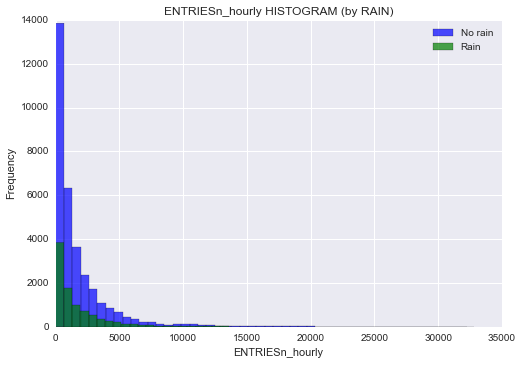

In [88]:
fig = plt.figure()
hist1 = df['ENTRIESn_hourly'][df['rain']==0].hist(color='blue', alpha=0.7, bins=50)
hist2 = df['ENTRIESn_hourly'][df['rain']==1].hist(color='green', alpha=0.7, bins=50)
ax = fig.add_subplot(111)
ax.set_title(r'ENTRIESn_hourly HISTOGRAM (by RAIN)')
ax.set_xlabel('ENTRIESn_hourly')
ax.set_ylabel('Frequency')
ax.legend(('No rain', 'Rain'), loc = 'upper right')


As the data are clearly skew on the left we can try improoving the visualization by using a log scale of the x-axis.

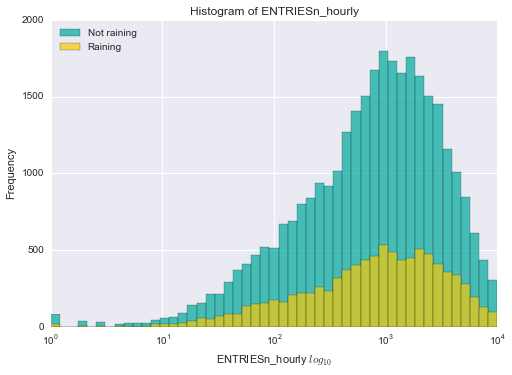

In [89]:
MIN, MAX = 1, 10000.0
fig = plt.figure()
data = df['ENTRIESn_hourly'][df['rain']==0].hist(bins=np.logspace(np.log10(MIN), np.log10(MAX), 50), alpha=0.7)
data = df['ENTRIESn_hourly'][df['rain']==1].hist(bins=np.logspace(np.log10(MIN), np.log10(MAX), 50), alpha=0.7)
ax = fig.add_subplot(111)
ax.set_title('Histogram of ENTRIESn_hourly')
ax.set_xlabel('ENTRIESn_hourly $log_{10}$')
ax.set_ylabel('Frequency')
ax.set_xscale('log')
ax.legend(('Not raining', 'Raining'), loc = 'upper left')

An other way to visualize the data is through the use of a boxplot

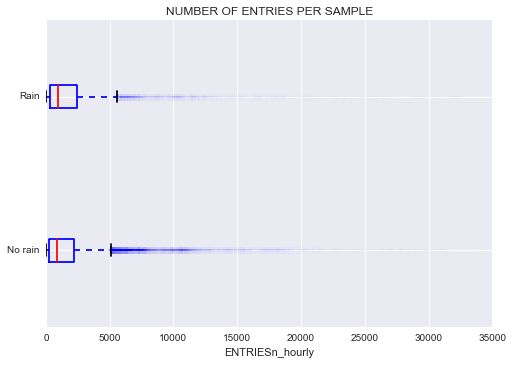

In [90]:
plt.boxplot([df['ENTRIESn_hourly'][df['rain']==0], df['ENTRIESn_hourly'][df['rain']==1]], vert=False)
plt.title('NUMBER OF ENTRIES PER SAMPLE')
plt.xlabel('ENTRIESn_hourly')
plt.yticks([1, 2], ['No rain', 'Rain'])

plt.show()

### 3.2 One visualization can be more freeform.

#### Ridership by day-of-week accross all stations

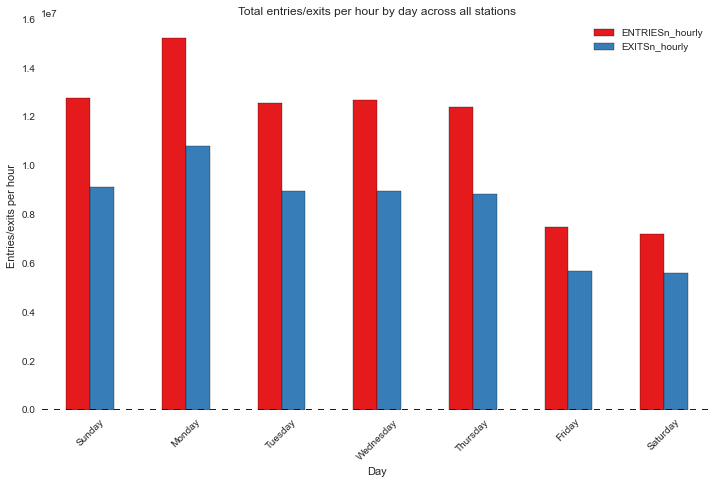

In [13]:
import brewer2mpl

turnstile_day = df[["day_week", "ENTRIESn_hourly", "EXITSn_hourly"]] \
            .groupby("day_week") \
            .agg(sum)

fig, ax = plt.subplots(figsize=(12, 7))
set1 = brewer2mpl.get_map('Set1', 'qualitative', 3).mpl_colors
turnstile_day.plot(ax=ax, kind="bar", color=set1)
ax.set_title("Total entries/exits per hour by day across all stations")
ax.legend(loc='best')
ax.set_ylabel("Entries/exits per hour")
ax.set_xlabel("Day")
ax.set_xticklabels(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"],
                   rotation=45)

Fridays and Saturdays are the least busy days.

#### Ridership by day-of-week per station

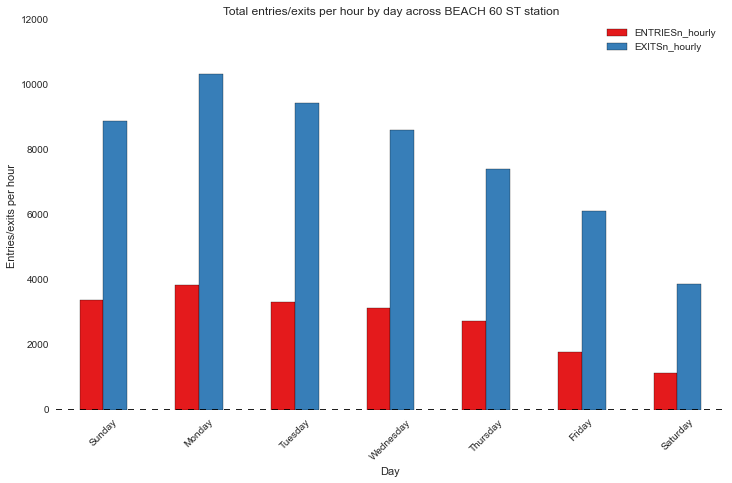

In [14]:
def get_station_data(station_name):
    """Filter subway dataframe for a particular station.
    Return two Pandas Series with ridership data - one for entries and one for exits.
    Prints number of elements in each of the series.
    This is a helper function for visulization.
    """
    filtered = df[df["station"] == station_name]
    turnstile_day = filtered[["day_week", "ENTRIESn_hourly", "EXITSn_hourly"]] \
            .groupby("day_week") \
            .agg(sum)
    
    return turnstile_day

def histogram_vis(station_name):
    """Produce a figure with two histograms for the particular station.
    One histogram for rain and one for no-rain.
    """
    turnstile_day = get_station_data(station_name)
          
    fig, ax = plt.subplots(figsize=(12, 7))
    set1 = brewer2mpl.get_map('Set1', 'qualitative', 3).mpl_colors
    turnstile_day.plot(ax=ax, kind="bar", color=set1)
    ax.set_title("Total entries/exits per hour by day across "+ station_name + " station")
    ax.legend(loc='best')
    ax.set_ylabel("Entries/exits per hour")
    ax.set_xlabel("Day")
    ax.set_xticklabels(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"],
                       rotation=45)
    
histogram_vis("BEACH 60 ST")

Using iPython interactive features to explore the data in an interactive way

In [15]:
station_group = df.groupby(['station'], as_index=False)# we don't make `station` being the index
ordered = station_group["station", "ENTRIESn_hourly"].aggregate(np.mean).sort("ENTRIESn_hourly")
top_stations = list(ordered.tail()["station"])
print(top_stations)

['ROOSEVELT AVE', '34 ST-HERALD SQ', 'MAIN ST', '42 ST-GRD CNTRL', '59 ST-COLUMBUS']


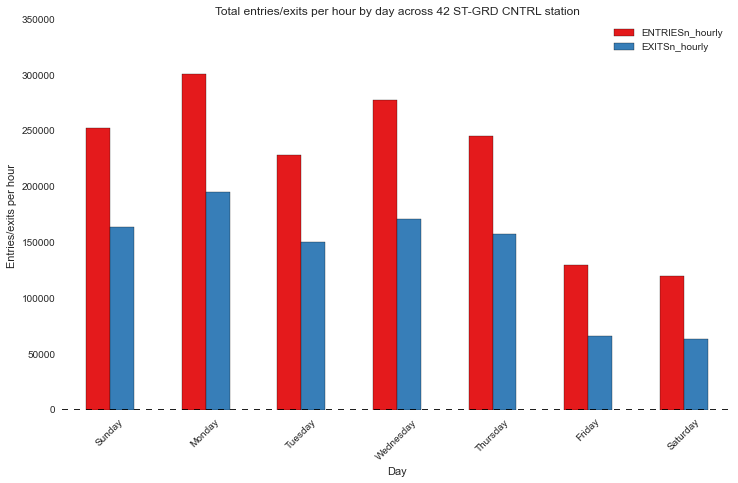

In [16]:
il = interact(histogram_vis, station_name=top_stations)

## 4. <u>Conclusion</u>

Data Science and Machine Learning are very fascinating topics and there are wealth of data on the internet these days that is just waiting to be mined.  Looking at the NYC MTA/weather data is just the begining of what techniques can be used to analysie data.  I really look forward to the next skills i will learn to en-rich my data analsysis/mining toolbox.

###4.1 From your analysis and interpretation of the data, do more people ride the NYC subway when it is raining or when it is not raining?  

From the current data set and the analyses performed so far, we can say with some level of certainty that more poeple ride the NYC subway when it is raining.

###4.2 What analyses lead you to this conclusion? You should use results from both your statistical tests and your linear regression to support your analysis.

The statistical test show us that the distribution of the number of entries is statistically different between rainy and non rainy days (The results of the Mann Whitney test support the null hypothesis with a small `p-value`).

Next, the difference in mean for both distribution (when it rain and when it doesn't rain) show also a difference (9.01%) but of course, looking only at means differences is insufficent, due to variance.

Next, we can also use the interpretetion of the `p-value` in the linear regression analysis :

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that we can reject the null hypothesis. In other words, a predictor that has a low `p-value` is likely to be a <b>meaningful addition</b> to the model because changes in the predictor's value are related to changes in the response variable.

Conversely, a larger (insignificant) `p-value` suggests that changes in the predictor are not associated with changes in the response.

In the output of the OLS model we can see that the predictor variables for the non-dummy features are significant because their p-values are 0.000.  This include the `rain` feature.


## 5. <u>Reflection</u>

###5.1 Please discuss potential shortcomings of the methods of your analysis, including: Dataset, Analysis, such as the linear regression model or statistical test.

Here are several elements that could potentially improove the analysis made for this project:

* The feature selection methodology used in the linear model construction is really rudimentary.  This process rely on good sence and no formal approach is used to clearly select the best features candidates in order to improove the model interpretability, reduced the training time or reduced the overfitting effect.

* The analysis is based on a linear model over the historical data; Maybe a better option would be to apply a non-linear model with other method that would fit more accurately the dataset. (polynomial regression for example).

* The size of the dataset is very small and very limitied to a single month (May) in the late spring / early summer of the year 2011.  As a result, the precipitation may not have a huge impact on the number of entries compare to a winter period for example.

In [183]:
print("Data has been taken between " + df['DATEn'].min() + " and " + df['DATEn'].max())

Data has been taken between 05-01-11 and 05-31-11


* It may be also interesting to correlate other data such as for example the traffic data and see if for example, in case of high traffic, the number of entries does increase systematically or not.
* Finally, it could be interesting to correlate information about the passenger themself.  Are they frequent travellers, why are they using the the subway ?

###5.2 (Optional) Do you have any other insight about the dataset that you would like to share with us?

The freedom visualization part of the project highlight a potentially sensitive issue with the dataset.  There seems to have more entries than there were exits.  

One explanations could be that there were errors, missing countings, or some turnstiles/stations were not included in the data set.  It is difficult to say if this issue impact the effect on both rain and no-rain data?

## 6. <u>References</u>

<ul>
<li><a href="https://store.continuum.io/cshop/anaconda/">(Tools) Anaconda Scientific Python Distribution</a></li>
<li><a href="http://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test">(Wiki) Mann–Whitney U test</a></li>
<li><a href="http://en.wikipedia.org/wiki/Feature_selection">(Wiki) Feature selection</a></li>
<li><a href="https://www.coursera.org/course/ml">(Course) Andrew Ng’s machine learning course on Coursera</a></li>
<li><a href="http://unsupervised-learning.com/multivariate-linear-regression-gradient-descent/">(Article) Multivariate Linear Regression with Gradient Descent</a></li>
<li><a href="http://www.ats.ucla.edu/stat/mult_pkg/faq/general/tail_tests.htm">(Article) What are the differences between one-tailed and two-tailed tests?</a></li>
<li><a href="http://blog.minitab.com/blog/adventures-in-statistics/how-high-should-r-squared-be-in-regression-analysis">(Article) How High Should R-squared Be in Regression Analysis?</a></li>
<li><a href="http://blog.minitab.com/blog/adventures-in-statistics/how-to-interpret-regression-analysis-results-p-values-and-coefficients">(Article) How to Interpret Regression Analysis Results: P-values and Coefficients</a>
</ul>